# importing libraries 

In [1]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
#from torchvision import datasets, transforms, models
from torchvision.utils import make_grid
from torchvision.transforms import Compose, Resize, ToTensor, Normalize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from torchvision import datasets
from pathlib import Path
from sklearn import metrics
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

# loading of model

In [ ]:
 #if model saved
import os
import torch
import pickle
ran_before = False   #set to True if already ran before or if you have pickle files with you
if (ran_before):
    #model trained
    mask_detector_cnn = pickle.load(open("bias_dataset\maskdetectorcnn.pkl", 'rb'))

    #for mask dataset
    maskDF = pickle.load(open('bias_dataset\maskDF.pickle', 'rb'))

    #validate dfs
    validate_dfs = pickle.load(open('bias_dataset/validate_dfs.pkl', 'rb'))
    #pickle.dump(validate_dfs, open("bias_dataset/validate_dfs.pkl", 'wb'))

    #for dataloader
    dataloader = pickle.load(open("bias_dataset\dataloader.pkl", 'rb'))


## for male 

In [2]:
from pathlib import Path
IMG_SIZE = 50
#datasetPath = Path('mask_dataset/')
male_CLOTH = "bias_dataset/gender/male/Cloth mask/"
male_N95MASK = "bias_dataset/gender/male/n95_mask/"
male_SURGICAL = "bias_dataset/gender/male/surgical_mask/"
male_WITHOUT = "bias_dataset/gender/male/no_mask/"
male_N95VALVE = "bias_dataset/gender/male/n95_valve/"
male_maskDF = pd.DataFrame()
LABELS = {male_CLOTH: 0, male_N95MASK: 1, male_SURGICAL: 2, male_WITHOUT: 3, male_N95VALVE : 4}
training_data = []



for label in LABELS:
    for f in tqdm(os.listdir(label)):
        path = os.path.join(label, f)
        #print(path)
        male_maskDF = male_maskDF.append(
        {
            "image": str(path),
            "mask": LABELS[label],
            "gender": "Male",
            "race": np.nan
        }, ignore_index = True)

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 509.90it/s]


## for female

In [3]:
from pathlib import Path
IMG_SIZE = 50
#datasetPath = Path('mask_dataset/')
female_CLOTH = "bias_dataset/gender/female/Cloth mask/"
female_N95MASK = "bias_dataset/gender/female/n95_mask/"
female_SURGICAL = "bias_dataset/gender/female/surgical_mask/"
female_WITHOUT = "bias_dataset/gender/female/no_mask/"
female_N95VALVE = "bias_dataset/gender/female/n95_valve/"
female_maskDF = pd.DataFrame()
LABELS = {female_CLOTH: 0, female_N95MASK: 1, female_SURGICAL: 2, female_WITHOUT: 3, female_N95VALVE : 4}
training_data = []


for label in LABELS:
    for f in tqdm(os.listdir(label)):
        path = os.path.join(label, f)
        #print(path)
        female_maskDF = female_maskDF.append(
        {
            "image": str(path),
            "mask": LABELS[label],
            "gender": "Female",
            "race" : np.nan
        }, ignore_index = True)

100%|███████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 507.09it/s]


## for east

In [4]:
from pathlib import Path
IMG_SIZE = 50
#datasetPath = Path('mask_dataset/')
east_CLOTH = "bias_dataset/race/east/Cloth mask/"
east_N95MASK = "bias_dataset/race/east/n95_mask/"
east_SURGICAL = "bias_dataset/race/east/surgical_mask/"
east_WITHOUT = "bias_dataset/race/east/no_mask/"
east_N95VALVE = "bias_dataset/race/east/n95_valve/"
east_maskDF = pd.DataFrame()
LABELS = {east_CLOTH: 0, east_N95MASK: 1, east_SURGICAL: 2, east_WITHOUT: 3, east_N95VALVE : 4}
training_data = []


for label in LABELS:
    for f in tqdm(os.listdir(label)):
        path = os.path.join(label, f)
        #print(path)
        east_maskDF = east_maskDF.append(
        {
            "image": str(path),
            "mask": LABELS[label],
            "gender": np.nan,
            "race" : "east"
        }, ignore_index = True)

100%|███████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 424.53it/s]


# for west 

In [5]:
from pathlib import Path
IMG_SIZE = 50
#datasetPath = Path('mask_dataset/')
west_CLOTH = "bias_dataset/race/east/Cloth mask/"
west_N95MASK = "bias_dataset/race/east/n95_mask/"
west_SURGICAL = "bias_dataset/race/east/surgical_mask/"
west_WITHOUT = "bias_dataset/race/east/no_mask/"
west_N95VALVE = "bias_dataset/race/east/n95_valve/"
west_maskDF = pd.DataFrame()
LABELS = {west_CLOTH: 0, west_N95MASK: 1, west_SURGICAL: 2, west_WITHOUT: 3, west_N95VALVE : 4}
training_data = []


for label in LABELS:
    for f in tqdm(os.listdir(label)):
        path = os.path.join(label, f)
        #print(path)
        west_maskDF = west_maskDF.append(
        {
            "image": str(path),
            "mask": LABELS[label],
            "gender": np.nan,
            "race" : "west"
        }, ignore_index = True)

100%|███████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 421.74it/s]


# appended all dataframes to one

In [6]:
maskDF= pd.DataFrame()
all_datasets = [male_maskDF, female_maskDF, east_maskDF, west_maskDF]

for df in all_datasets:
    maskDF = maskDF.append(df)

In [7]:
maskDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8200 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gender  4200 non-null   object 
 1   image   8200 non-null   object 
 2   mask    8200 non-null   float64
 3   race    4000 non-null   object 
dtypes: float64(1), object(3)
memory usage: 320.3+ KB


# shuffling the dataset

In [8]:
maskDF = maskDF.sample(frac = 1)

In [9]:
maskDF

,gender,image,mask,race
1500,Male,bias_dataset/gender/male/no_mask/without_mask_...,3.0,NaN
652,Male,bias_dataset/gender/male/n95_mask/coronavirus-...,1.0,NaN
676,NaN,bias_dataset/race/east/n95_mask/coronavirus-pr...,1.0,west
1978,Female,bias_dataset/gender/female/n95_valve/female_ 6...,4.0,NaN
1447,Female,bias_dataset/gender/female/no_mask/without_mas...,3.0,NaN
...,...,...,...,...
659,Female,bias_dataset/gender/female/n95_mask/n95 151.png,1.0,NaN
228,NaN,bias_dataset/race/east/Cloth mask/with_mask_28...,0.0,east
388,NaN,bias_dataset/race/east/Cloth mask/with_mask_68...,0.0,west
1849,NaN,bias_dataset/race/east/n95_valve/n95_valve_ 53...,4.0,west


# saving the mask dataframe

In [10]:
dftrain = 'bias_dataset/maskDF.pickle'
print(f'Saving Dataframe to: {dftrain}')
maskDF.to_pickle(dftrain)

Saving Dataframe to: bias_dataset/maskDF.pickle


#  train_test_split and train test dataframe dumping

In [13]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(maskDF, test_size= 0.2, shuffle=True )
dftrain = "bias_dataset/train_dataset.pickle"
print(f'Saving Dataframe to: {dftrain}')
train_set.to_pickle(dftrain)  

dftest = "bias_dataset/test_dataset.pickle"
print(f'Saving Dataframe to: {dftest}')
test_set.to_pickle(dftest)

Saving Dataframe to: bias_dataset/train_dataset.pickle
Saving Dataframe to: bias_dataset/test_dataset.pickle


In [14]:
print(train_set.shape)
print(test_set.shape)

(6560, 4)
(1640, 4)


# preprocessing of our datas

In [15]:
from PIL import Image
import numpy as np
from torch import long, tensor
from torch.utils.data.dataset import Dataset
from torchvision.transforms import Compose, Resize, ToTensor, Normalize

class MaskDetectionDataset(Dataset):
    def __init__(self, dataFrame):
        self.dataFrame = dataFrame
        self.transformations = Compose([
            Resize((32, 32)),
            ToTensor(),
            Normalize((0.5667, 0.5198, 0.4955),(0.3082, 0.2988, 0.3053))  #mean, std dev
        ])
    
    def __getitem__(self, key):
        
        row = self.dataFrame.iloc[key]
        image = Image.open(row['image']).convert('RGB')
        return {
          'image': self.transformations(image),
          'mask': tensor([row['mask']], dtype=long),
          'path': row['image'] 
            
        }
    
    def __len__(self):
        return len(self.dataFrame.index)

In [16]:
import torch
import torchvision
from torchvision.datasets import ImageFolder
def load_data(path):
    reshape_size = torchvision.transforms.Resize((32,32))
    data_type = torchvision.transforms.ToTensor()
    normalized_metrics = torchvision.transforms.Normalize(
        (0.5667, 0.5198, 0.4955),(0.3082, 0.2988, 0.3053),
    )
    return ImageFolder(root = path,transform = torchvision.transforms.Compose([reshape_size, data_type, normalized_metrics]))

# used CNN using Pytorch

In [17]:
import torch
import torch.nn.init as init
import torch.nn as nn
from torch import Tensor
from torch.nn import Conv2d
from torch.nn import CrossEntropyLoss 
from torch.nn import Linear
from torch.nn import MaxPool2d
from torch.nn import ReLU
from torch.nn import Sequential
from torch.nn import functional
                      
class MaskDetectorCNN(nn.Module):
    def __init__(self):
        super(MaskDetectorCNN, self).__init__()
        self.conv_layer = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(inplace=True),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(inplace=True),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.fc_layer = nn.Sequential(
            nn.Dropout(p=0.1),
            nn.Linear(8 * 8 * 128, 1600), 

            nn.ReLU(inplace=True),
            nn.Linear(1600, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.1),
            nn.Linear(512, 5)
        )
    def forward(self, x):
        x = self.conv_layer(x)
        x = x.view(x.size(0), -1)
        x = self.fc_layer(x)
        
        return x
    
    
mask_detector_cnn = MaskDetectorCNN()
print(mask_detector_cnn) 


MaskDetectorCNN(
  (conv_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01, inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): LeakyReLU(negative_slope=0.01, inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): LeakyReLU(negative_slope=0.01, inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): LeakyReLU(negative_slope=0.01, inplac

# used k fold cross validation and dataloading

In [24]:
from pathlib import Path
from typing import Dict, List, Union
import pandas as pd
import torch
import torch.nn.init as init
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from torch import Tensor
from torch.nn import Conv2d
from torch.nn import CrossEntropyLoss 
from torch.nn import Linear
from torch.nn import MaxPool2d
from torch.nn import ReLU
from torch.nn import Sequential
from torch.nn import functional
from torch.optim import Adam
from torch.optim.optimizer import Optimizer
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from torch import Tensor
import itertools
import matplotlib.pyplot as plt

def plot_CNN(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=42)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("confusion matrix with normalization")
    else:
        print('Confusion matrix without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('Actual labels')
    plt.xlabel('Predicted labels')

"""def prepare_data_CNN(mask_df_path) -> None:
        mask_dataframe = pd.read_pickle(mask_df_path)
        print(mask_dataframe['mask'].value_counts())
        train_set, test_set = train_test_split(maskDF, test_size= 0.2, shuffle=True )   #train test split
        return [ MaskDetectionDataset(train_set), MaskDetectionDataset(test_set), CrossEntropyLoss()
            ]
"""
    
def prepare_data_CNN(mask_df_path) -> None:
        mask_dataframe = pd.read_pickle(mask_df_path)
        print(mask_dataframe['mask'].value_counts())
        skf = StratifiedKFold(n_splits=10, shuffle=True)  #k-fold cross validation
        train_folds = []
        validate_folds = []
        for train_index, validate_index in skf.split(mask_dataframe, mask_dataframe['mask']):
            train_folds.append(MaskDetectionDataset(mask_dataframe.iloc[train_index]))
            validate_folds.append(MaskDetectionDataset(mask_dataframe.iloc[validate_index]))
        return [
            train_folds, validate_folds,CrossEntropyLoss()
            ]

def train_dataloader(train_dfs) -> DataLoader:
    return DataLoader(train_dfs, batch_size=64, shuffle=True, num_workers=0)

def val_dataloader(validate_dfs) -> DataLoader:
    return DataLoader(validate_dfs, batch_size=64, num_workers=0)   


train_dfs, validate_dfs, cross_entropy_loss = prepare_data_CNN("bias_dataset/train_dataset.pickle")


4.0    1444
1.0    1291
3.0    1288
2.0    1269
0.0    1268
Name: mask, dtype: int64


In [25]:
def test_dataloader(dataset):
    return DataLoader(dataset=dataset,
                      num_workers=2, 
                      shuffle=True,
                      batch_size=100
                     )

# dumping validate dataframe

In [26]:
import pickle
pickle.dump(validate_dfs, open("bias_dataset/validate_dfs.pkl", 'wb'))

# Training our model

In [27]:
epochs = 10
learning_rate = 0.001 


import warnings
warnings.filterwarnings('ignore')

def training_model(train_fold):
    acc_list = []
    loss_list = []
    optimizer = Adam(mask_detector_cnn.parameters(), lr=learning_rate)
    for epoch in range(epochs):
        total=0
        correct=0
        loss_train = 0.0
        for i, data in enumerate(train_dataloader(train_fold), 0):
            inputs, labels = data['image'], data['mask']
            labels = labels.flatten()
            outputs = mask_detector_cnn(inputs)
            loss = cross_entropy_loss(outputs, labels)
            #loss_list.append(loss.item())
            optimizer.zero_grad() 
            loss.backward()
            optimizer.step() 
            """loss_train += loss
        print('model running')    
        print(f'Training Loss after epoch {epoch} :', loss_train)"""
            total += labels.size(0)
            _, predicted = torch.max(outputs.data, 1) 
            correct += (predicted == labels).sum().item() 
            loss_train += loss
        print('Training Loss after epoch {} : {} Accuracy: {:.2f}%'.format(epoch, loss_train,(correct / total) * 100)) 
        
       
        
#training_model()        

# model evaluation

In [28]:
from numpy import vstack
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

def evaluate_model(validate_fold):
    predictions, actuals = torch.tensor([]), torch.tensor([])
    for i, data in enumerate(val_dataloader(validate_fold)):
        inputs, targets = data['image'], data['mask']
        targets = targets.flatten()
        output = mask_detector_cnn(inputs)
        output = torch.argmax(output,axis=1)
        predictions = torch.cat((predictions, output.flatten()), dim=0)
        actuals = torch.cat((actuals, targets), dim=0)

    return (confusion_matrix(actuals.numpy(), predictions.numpy()),accuracy_score(actuals, predictions),*precision_recall_fscore_support(actuals.numpy(), predictions.numpy(),average='macro'))

# checking the accuracy, confusion matrix

Running Fold : 1
Training Loss after epoch 0 : 8.886163711547852 Accuracy: 96.87%
Training Loss after epoch 1 : 4.982962131500244 Accuracy: 98.26%
Training Loss after epoch 2 : 6.051277160644531 Accuracy: 97.82%
Training Loss after epoch 3 : 3.5576493740081787 Accuracy: 98.71%
Training Loss after epoch 4 : 5.273223400115967 Accuracy: 97.92%
Training Loss after epoch 5 : 8.245625495910645 Accuracy: 97.15%
Training Loss after epoch 6 : 3.4078903198242188 Accuracy: 98.49%
Training Loss after epoch 7 : 1.6189911365509033 Accuracy: 99.27%
Training Loss after epoch 8 : 1.2695282697677612 Accuracy: 99.29%
Training Loss after epoch 9 : 1.1041265726089478 Accuracy: 99.39%
Running Fold : 2
Training Loss after epoch 0 : 140.74024963378906 Accuracy: 45.07%
Training Loss after epoch 1 : 76.59793853759766 Accuracy: 68.50%
Training Loss after epoch 2 : 50.52906036376953 Accuracy: 79.88%
Training Loss after epoch 3 : 31.869293212890625 Accuracy: 87.91%
Training Loss after epoch 4 : 19.18161964416504 A

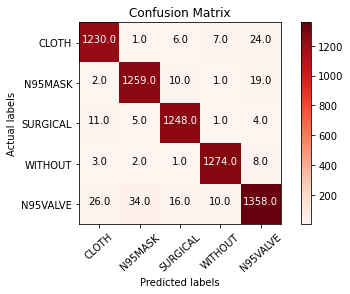

In [29]:
fold = []
fold_confusion_matrix = np.zeros((5,5))
classes = ['CLOTH', 'N95MASK', 'SURGICAL', 'WITHOUT', 'N95VALVE']
for index in range(len(train_dfs)):
    print("Running Fold : "+ str(index+1))
    training_model(train_dfs[index])
    result = evaluate_model(validate_dfs[index])
    #conf_mat, acc, pre, recall, f-score
    fold.append(result[1:-1])
    fold_confusion_matrix = np.add(fold_confusion_matrix,result[0])
    if index != len(train_dfs)-1:
        mask_detector_cnn = MaskDetectorCNN()
    
metrics_df = pd.DataFrame(fold, columns=['ACCURACY', 'PRECISION', 'RECALL', 'F-SCORE'])
print()
print("METRICS")
print(metrics_df.mean())
print()
print("10-folds cross validation")
plot_CNN(fold_confusion_matrix, classes)

In [30]:
def prepare_predict_df():
    
    testDF = test_set
                
    return MaskDetectionDataset(testDF)

In [31]:
test_set = test_set.reset_index(drop=True)
test_set.tail()

,gender,image,mask,race
1635,Female,bias_dataset/gender/female/Cloth mask/cloth 12...,0.0,NaN
1636,Female,bias_dataset/gender/female/Cloth mask/females ...,0.0,NaN
1637,Male,bias_dataset/gender/male/no_mask/without_mask_...,3.0,NaN
1638,NaN,bias_dataset/race/east/surgical_mask/with_mask...,2.0,west
1639,NaN,bias_dataset/race/east/surgical_mask/p60000067...,2.0,east


# prediction of our model

Actual : Cloth mask
Predicted :CLOTHMASK


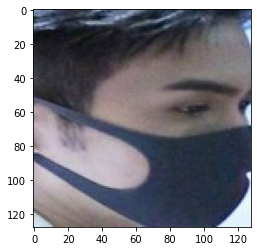

In [32]:
import random
class_mapping2 = {0: 'CLOTHMASK', 1: 'N95MASK', 2: 'SURGICALMASK', 3: 'WITHOUTMASK', 4: 'N95VALVE'}

def prediction_CNN():
    test_df = prepare_predict_df()
    
    rand_ind = random.choice(list(range(0,32)))
    rand_sampler = torch.utils.data.RandomSampler(test_df, num_samples=32, replacement=True)
    data = iter(DataLoader(test_df, batch_size=32, num_workers=0, sampler=rand_sampler)).next()
    inputs,targets = data['image'], data['mask']
    output = mask_detector_cnn(inputs)
    output = torch.argmax(output,axis=1)
    p = data['path'][rand_ind]
    partitions = p.split('/')[3]
    print("Actual :", partitions)
    image = Image.open(data['path'][rand_ind])
    plt.imshow(np.asarray(image))
    print("Predicted :" + class_mapping2[output[rand_ind].tolist()])

    
prediction_CNN() 

# dumping

In [33]:
import pickle
pickle.dump(DataLoader, open("bias_dataset\dataloader.pkl", 'wb'))
pickle.dump(mask_detector_cnn, open("bias_dataset\maskdetectorcnn.pkl", 'wb'))

# image prediction

In [34]:
def predict_image(model, image, labels=['Cloth mask', 'n95_mask', 'surgical_mask', 'no_mask', 'n95_valve'], device="cpu"):
    """
    Given an image, predict the class of the image.
    """
    model.eval()
    with torch.no_grad():
        image = image.to(device)
        output = model(image.unsqueeze(0))
    pred = output.argmax(dim=1).cpu().numpy()
    return labels[pred[0]]

## for gender bias

In [35]:
import glob
import torchvision.transforms as transforms
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import tqdm
def gender_bias(model, data_path, device):
    transform = transforms.Compose(
            [transforms.ToTensor(),
            transforms.Resize((32,32)),
            transforms.Normalize(mean=[0.5667, 0.5198, 0.4955], std=[0.3082, 0.2988, 0.3053])] 
    )
    for gender in ['male', 'female']:
        preds = []
        true = []
        print("*"*50)
        print("Predictions for {} images.".format(gender))
        gender_path = os.path.join(data_path, gender)
        for mask in ['Cloth mask', 'n95_mask', 'n95_valve','no_mask', 'surgical_mask' ]:
            preds_counts = {
                'Cloth mask': 0,
                'n95_mask':  0,
                'n95_valve':0,
                'no_mask': 0,
                'surgical_mask': 0
                
            }
            masked_image_path = os.path.join(gender_path, mask, "*.*")
            files =  glob.glob(masked_image_path)
            for image_path in tqdm.tqdm(files, total=len(files)):
                image = Image.open(image_path).convert('RGB')
                image = transform(image)
                pred = predict_image(model, image, device=device)
                preds_counts[pred] += 1
            for x in preds_counts:
                preds.extend([x]*preds_counts[x])
            true.extend([mask]*len(files))

        print(classification_report(true, preds))
        cm = confusion_matrix(true, preds)
        print(cm)

        #df_cm = pd.DataFrame(cm, index = [i for i in ['Cloth mask', 'N95_mask', 'surgical_mask',"no_mask", "n95_valve"]], columns = [i for i in ['Cloth mask', 'N95_mask', 'surgical_mask',"no_mask", "n95_valve"]])
        #lst.append(df_cm)
        """plt.figure(figsize = (10,7))
        heat = sn.heatmap(df_cm, annot=True)
        plt.xlabel("Predicted Values")
        plt.ylabel("Actual Values")"""
        #disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Cloth mask', 'n95_mask', 'surgical_mask', 'no_mask', 'n95_valve'])
        #disp.plot()


## for race bias

In [56]:
import glob
import torchvision.transforms as transforms
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import tqdm
def race_bias(model, data_path, device):
    transform = transforms.Compose(
            [transforms.ToTensor(),
            transforms.Resize((32,32)),
            transforms.Normalize(mean=[0.5667, 0.5198, 0.4955], std=[0.3082, 0.2988, 0.3053])] 
    )
    for race in ['east', 'west']:
        preds = []
        true = []
        print("*"*1000)
        print("Predictions for {} images.".format(race))
        race_path = os.path.join(data_path, race)
        for mask in ['Cloth mask', 'n95_mask', 'n95_valve','no_mask', 'surgical_mask' ]:
            preds_counts = {
                'Cloth mask': 0,
                'n95_mask':  0,
                'n95_valve':0,
                'no_mask': 0,
                'surgical_mask': 0
                
            }
            masked_image_path = os.path.join(race_path, mask, "*.*")
            files =  glob.glob(masked_image_path)
            for image_path in tqdm.tqdm(files, total=len(files)):
                image = Image.open(image_path).convert('RGB')
                image = transform(image)
                pred = predict_image(model, image, device=device)
                preds_counts[pred] += 1
            for x in preds_counts:
                preds.extend([x]*preds_counts[x])
            true.extend([mask]*len(files))

        print(classification_report(true, preds))
        cm = confusion_matrix(true, preds)
        print(cm)

        #df_cm = pd.DataFrame(cm, index = [i for i in ['Cloth mask', 'N95_mask', 'surgical_mask',"no_mask", "n95_valve"]], columns = [i for i in ['Cloth mask', 'N95_mask', 'surgical_mask',"no_mask", "n95_valve"]])
        #lst.append(df_cm)
        """plt.figure(figsize = (10,7))
        heat = sn.heatmap(df_cm, annot=True)
        plt.xlabel("Predicted Values")
        plt.ylabel("Actual Values")"""
        #disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Cloth mask', 'n95_mask', 'surgical_mask', 'no_mask', 'n95_valve'])
        #disp.plot()


# classification report for gender and race bias

In [57]:

if __name__ == "__main__":
    CFG = {
        'race_data_path': 'bias_dataset2/race',
        'gender_data_path': 'bias_dataset2\gender',
        'device': 'cuda' if torch.cuda.is_available() else 'cpu',
        'model_checkpoints': 'bias_dataset\maskdetectorcnn.pkl',
    }

    model = mask_detector_cnn
    
    

In [58]:
gender_bias(model, CFG['gender_data_path'], CFG['device'])

 34%|███████████████████████████▍                                                     | 22/65 [00:00<00:00, 218.95it/s]

**************************************************
Predictions for male images.


 66%|█████████████████████████████████████████████████████▎                           | 48/73 [00:00<00:00, 235.70it/s]

               precision    recall  f1-score   support

   Cloth mask       1.00      0.92      0.96        65
     n95_mask       0.99      0.85      0.91       152
    n95_valve       1.00      0.72      0.84        65
      no_mask       1.00      0.86      0.92        56
surgical_mask       0.55      1.00      0.71        66

     accuracy                           0.87       404
    macro avg       0.91      0.87      0.87       404
 weighted avg       0.92      0.87      0.88       404

[[ 60   0   0   0   5]
 [  0 129   0   0  23]
 [  0   1  47   0  17]
 [  0   0   0  48   8]
 [  0   0   0   0  66]]
**************************************************
Predictions for female images.


100%|█████████████████████████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 228.75it/s]

               precision    recall  f1-score   support

   Cloth mask       0.62      0.95      0.75        73
     n95_mask       0.97      0.81      0.88        73
    n95_valve       0.93      0.85      0.89        74
      no_mask       1.00      0.80      0.89        65
surgical_mask       1.00      0.87      0.93        60

     accuracy                           0.86       345
    macro avg       0.90      0.85      0.87       345
 weighted avg       0.90      0.86      0.86       345

[[69  0  4  0  0]
 [13 59  1  0  0]
 [ 9  2 63  0  0]
 [13  0  0 52  0]
 [ 8  0  0  0 52]]


In [52]:
race_bias(model, CFG['race_data_path'], CFG['device'])

 33%|██████████████████████████▌                                                      | 21/64 [00:00<00:00, 208.09it/s]

**************************************************
Predictions for east images.


 38%|██████████████████████████████▍                                                  | 24/64 [00:00<00:00, 235.51it/s]

               precision    recall  f1-score   support

   Cloth mask       0.57      1.00      0.73        64
     n95_mask       1.00      0.78      0.88        64
    n95_valve       0.96      0.81      0.88        64
      no_mask       1.00      0.81      0.90        64
surgical_mask       1.00      0.81      0.90        64

     accuracy                           0.84       320
    macro avg       0.91      0.84      0.86       320
 weighted avg       0.91      0.84      0.86       320

[[64  0  0  0  0]
 [12 50  2  0  0]
 [12  0 52  0  0]
 [12  0  0 52  0]
 [12  0  0  0 52]]
**************************************************
Predictions for west images.


100%|█████████████████████████████████████████████████████████████████████████████████| 64/64 [00:00<00:00, 226.02it/s]

               precision    recall  f1-score   support

   Cloth mask       0.55      1.00      0.71        64
     n95_mask       0.98      0.81      0.89        64
    n95_valve       0.84      0.83      0.84        77
      no_mask       1.00      0.81      0.90        64
surgical_mask       1.00      0.56      0.72        64

     accuracy                           0.80       333
    macro avg       0.87      0.80      0.81       333
 weighted avg       0.87      0.80      0.81       333

[[64  0  0  0  0]
 [12 52  0  0  0]
 [12  1 64  0  0]
 [12  0  0 52  0]
 [16  0 12  0 36]]


In [ ]:
"""lst = []
def validate_bias(model, loader, type, metric_flag=1):
    total = 0
    correct = 0
    acc_percent = 0
    classes = ['Cloth mask', 'N95_mask', 'surgical_mask',"no_mask", "n95_valve"]
    with torch.no_grad():
        for imgs, labels in loader:
            outputs = model(imgs)
            #print(outputs)
            #print(torch.cat(stack))
            predicted = (torch.max(outputs, dim = 1)[1]).numpy()
            total += labels.shape[0]
            correct += int((predicted == labels.numpy()).sum())
            if metric_flag:
                #print(metrics.confusion_matrix(predicted, labels))
                confusion = metrics.confusion_matrix(predicted, labels)
                cm_array = metrics.confusion_matrix(predicted, labels)
                df_cm = pd.DataFrame(cm_array, index = [i for i in ['Cloth mask', 'N95_mask', 'surgical_mask',"no_mask", "n95_valve"]], columns = [i for i in ['Cloth mask', 'N95_mask', 'surgical_mask',"no_mask", "n95_valve"]])
                lst.append(df_cm)
                #plt.savefig('ConfusionMatrix'+type+'.png')
                #print(metrics.classification_report(predicted, labels, target_names=['Cloth mask', 'N95_mask', 'surgical_mask',"no_mask", "n95_valve"]))
                classification = metrics.classification_report(predicted, labels, target_names=['Cloth mask', 'N95_mask', 'surgical_mask',"no_mask", "n95_valve"])                                  
    acc_percent = (correct / total) * 100
    
    return acc_percent, confusion, classification, lst"""

In [ ]:
"""def biasTest():
    #model =  mask_detector_cnn
    model = pickle.load(open("mask_dataset\maskdetectorcnn.pkl", 'rb'))
    print("""Type of Bias to test:
    1. Gender
    2. Race """)
    biastype = int(input())
    if biastype == 1:
        data = "bias_dataset/gender"
        ##For Male
        print("-------------------------------------------FOR MALE----------------------------------------")
        print("\n")
        path_male = data + "/male"
        dataset = load_data(path_male)
        
        train_b, test_b = train_test_split(dataset, test_size= 0.4, shuffle=True)
        test_loader_bias = test_dataloader(test_b)
        acc,cm,cl,lst = validate_bias(model, test_loader_bias, "male")    #passing our model
        print("Accuracy for Test Data containing only Males - ", acc)
        print(cm)
        print(cl)

        plt.figure(figsize = (10,7))
        heat = sn.heatmap(lst[0], annot=True)
        plt.xlabel("Predicted Values for male")
        plt.ylabel("Actual Values for male")
        
        
        print("-------------------------------------------FOR FEMALE--------------------------------------")
        print("\n")
        path_female = data + "/female"
        dataset = load_data(path_female)
        train_b, test_b = train_test_split(dataset, test_size= 0.4, shuffle=True)
        test_loader_bias = test_dataloader(test_b)
        acc,cm,cl,lst = validate_bias(model, test_loader_bias, "female")
        print("Accuracy for Test Data containing only Females - ", acc)
        print(cm)
        print(cl)
        plt.figure(figsize = (10,7))
        heat = sn.heatmap(lst[1], annot=True)
        plt.xlabel("Predicted Values for female")
        plt.ylabel("Actual Values for female")
        
    #if biastype == 2:
      
    else:
        data = "bias_dataset/race"
        
        print("-------------------------------------------FOR EASTERN-------------------------------------")
        ##For Eastern
        path_east = data + "/east"
        dataset = load_data(path_east)
        train_b, test_b = train_test_split(dataset, test_size= 0.2, shuffle=True)
        test_loader_bias = test_dataloader(test_b)
        acc,cm,cl,lst = validate_bias(model, test_loader_bias, "east")
        print("Accuracy for Test Data containing only Eastern - ", acc)
        print(cm)
        print(cl)
        plt.figure(figsize = (10,7))
        heat = sn.heatmap(lst[2], annot=True)
        plt.xlabel("Predicted Values for eastern")
        plt.ylabel("Actual Values for eastern")
        
        
        ##For Western
        print("------------------------------------------FOR WESTERN---------------------------------------")
        path_west = data + "/west"
        dataset = load_data(path_west)
        train_b, test_b = train_test_split(dataset, test_size= 0.2, shuffle=True)
        test_loader_bias = test_dataloader(test_b)
        acc,cm,cl,lst = validate_bias(model, test_loader_bias, "west")
        print("Accuracy for Test Data containing only Western - ", acc) 
        print(cm)
        print(cl)
        plt.figure(figsize = (10,7))
        heat = sn.heatmap(lst[3], annot=True)
        plt.xlabel("Predicted Values for western")
        plt.ylabel("Actual Values for western")
        """

In [ ]:
#biasTest()

# for single image predict

In [ ]:
"""
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader,Dataset
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torchvision
class_mapping2 = {0: 'CLOTHMASK', 1: 'N95MASK', 2: 'SURGICALMASK', 3: 'WITHOUTMASK', 4: 'N95VALVE'}
class_mapping1 = {CLOTH: 0, N95MASK: 1, SURGICAL: 2, WITHOUT: 3, N95VALVE : 4}

def pre_image(image_path,model):
    
    img = Image.open(image_path)
    mean = [0.5667, 0.5198, 0.4955] 
    std = [0.3082, 0.2988, 0.3053] 
    transform_norm = transforms.Compose([transforms.ToTensor(), 
    transforms.Resize((32, 32)),transforms.Normalize(mean, std)])
    # get normalized image
    img_normalized = transform_norm(img).float()
    img_normalized = img_normalized.unsqueeze_(0)

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = mask_detector_cnn
    model = model.to(device)
    img_normalized = img_normalized.to(device)
 
    with torch.no_grad():
        model.eval()  
        output =model(img_normalized)
        # print(output)
        index = output.data.cpu().numpy().argmax()
        plt.imshow(img)
        plt.title(f'Prediction: {class_mapping2[index]}')
        plt.show()
        return index
"""

In [ ]:
"""predict_class = pre_image(r"C:\Users\User\Desktop\COMP - 6721\Assignment3_CNN\mask_dataset\surgical_mask/0112.png",mask_detector_cnn)
print(predict_class)"""